In [2]:
import numpy.ma
import os, sys
import numpy as np
import re
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pdb
import numpy.ma
import scipy.optimize
import scipy.interpolate
import scipy.ndimage
from matplotlib.backends.backend_pdf import PdfPages
from astropy.time import Time
import time
from matplotlib.ticker import AutoMinorLocator
import math
from glob import glob
from matplotlib.colors import LogNorm
from astropy.convolution import Gaussian1DKernel, convolve
from scipy import interpolate
#from PyAstronomy import pyasl
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn, QTable

In [6]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Text(8185.3, 1.8, 'Na I')

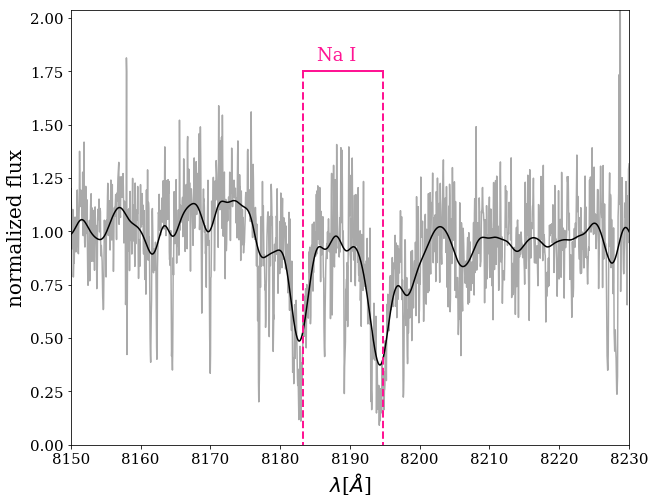

In [9]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
fig = plt.figure(figsize=(10, 8))

#plt.rcParams.update({'font.size': 14})
#pdf = PdfPages('roque12_uves.pdf') 
file='ADP.2017-10-26T012358.598.fits'

data,header=fits.getdata(file,1,header=True)
header=fits.getheader(file,0)
lam=np.squeeze(data['wave'], axis=(0,))
spec=np.squeeze(data['flux_reduced'], axis=(0,))
spec=spec/np.median(spec)/2

plt.plot(lam,spec,color='darkgrey')
g = Gaussian1DKernel(stddev=20)
spec = convolve(spec, g,'extend')
plt.plot(lam,spec,c='k')
l1,l2=8183.3,8194.8

plt.xlim(8150,8230)
plt.ylim(0,4*np.nanmedian(spec))
plt.xlabel(r'$\lambda$'+'['+r'$\AA$'+']',fontsize=20)
plt.ylabel('normalized flux', fontsize=20)
plt.plot([l1,l2],[1.75,1.75],'deeppink',linewidth=2)
plt.plot([l1,l1],[1.75,0],'deeppink',ls='--',linewidth=2)
plt.plot([l2,l2],[1.75,0],'deeppink',ls='--',linewidth=2)
plt.text(l1+2,1.8,'Na I',color='deeppink',fontsize=18)
